In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('C:/Users/hello/Downloads/data/data/togo-dapaong_qc.csv')
number_column= df.drop(['Timestamp', 'Comments'], axis=1)

medians= number_column.median()
means=number_column.mean()
stds= number_column.std()

print(f' mean: {means}')
print(f' Median: {medians}')
print(f' Standard deviation: {stds}')

 mean: GHI              230.555040
DNI              151.258469
DHI              116.444352
ModA             226.144375
ModB             219.568588
Tamb              27.751788
RH                55.013160
WS                 2.368093
WSgust             3.229490
WSstdev            0.557740
WD               161.741845
WDstdev           10.559568
BP               975.915242
Cleaning           0.000535
Precipitation      0.001382
TModA             32.444403
TModB             33.543330
dtype: float64
 Median: GHI                2.1
DNI                0.0
DHI                2.5
ModA               4.4
ModB               4.3
Tamb              27.2
RH                59.3
WS                 2.2
WSgust             2.9
WSstdev            0.5
WD               199.1
WDstdev           10.8
BP               976.0
Cleaning           0.0
Precipitation      0.0
TModA             28.4
TModB             28.4
dtype: float64
 Standard deviation: GHI              322.532347
DNI              250.956962
DHI       

In [2]:
missing_value= df.isnull().sum()
print(missing_value)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [3]:

negative_values = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0
print(negative_values.sum())

GHI       257385
DNI            0
DHI            0
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


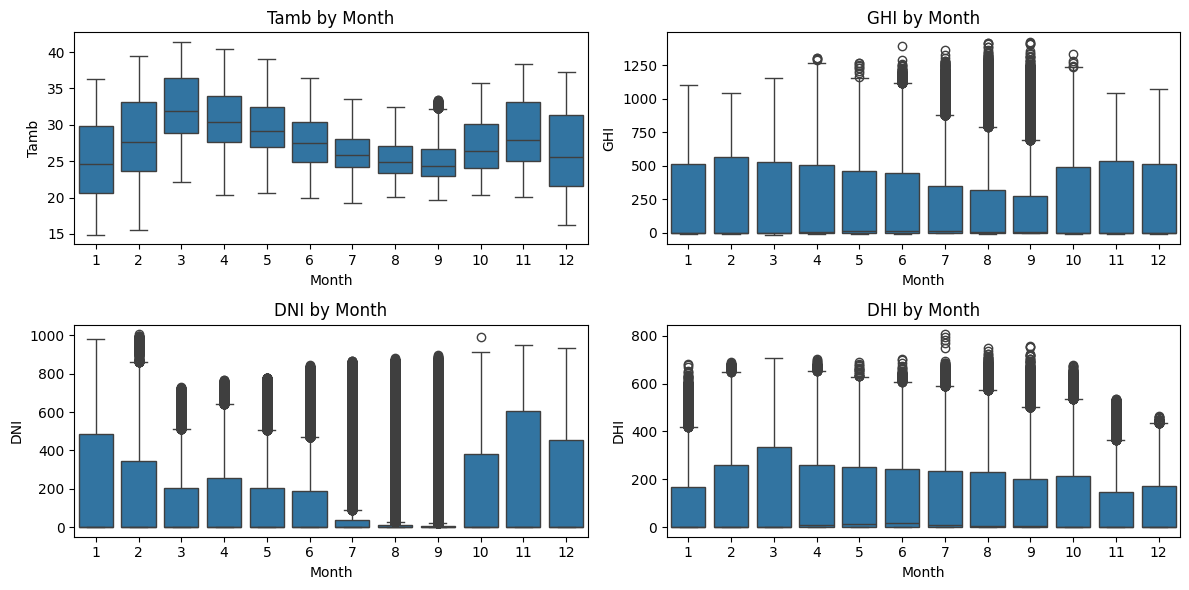

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Extract month and hour for analysis
df['Month'] = df.index.month
df['Hour'] = df.index.hour

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='Month', y='Tamb', data=df)
plt.title('Tamb by Month')

plt.subplot(2, 2, 2)
sns.boxplot(x='Month', y='GHI', data=df)
plt.title('GHI by Month')

plt.subplot(2, 2, 3)
sns.boxplot(x='Month', y='DNI', data=df)
plt.title('DNI by Month')

plt.subplot(2, 2, 4)
sns.boxplot(x='Month', y='DHI', data=df)
plt.title('DHI by Month')

plt.tight_layout()
plt.show()

C:\Users\hello\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


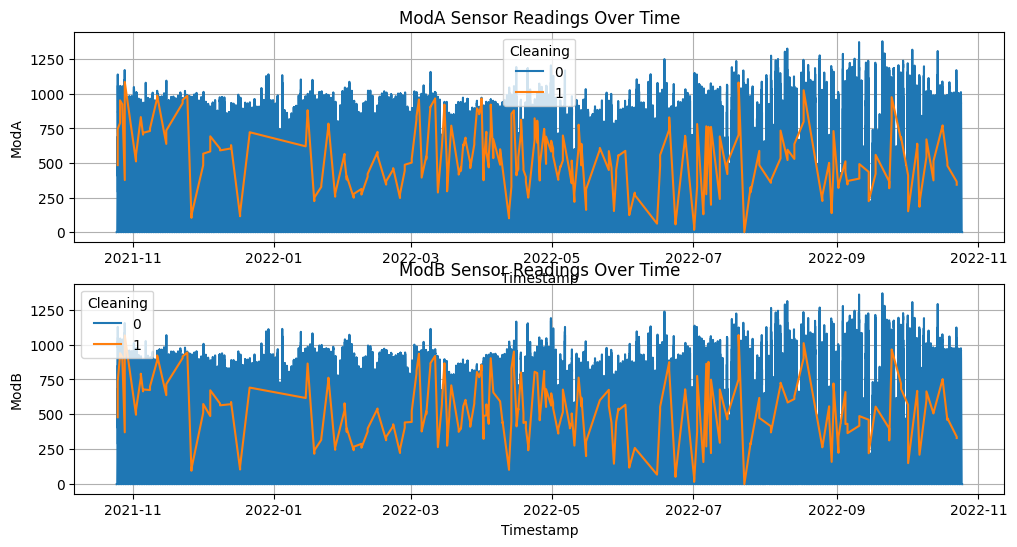

In [5]:

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning')
plt.title('ModA Sensor Readings Over Time')
plt.grid()

plt.subplot(2, 1, 2)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning')
plt.title('ModB Sensor Readings Over Time')
plt.grid()
plt.show()

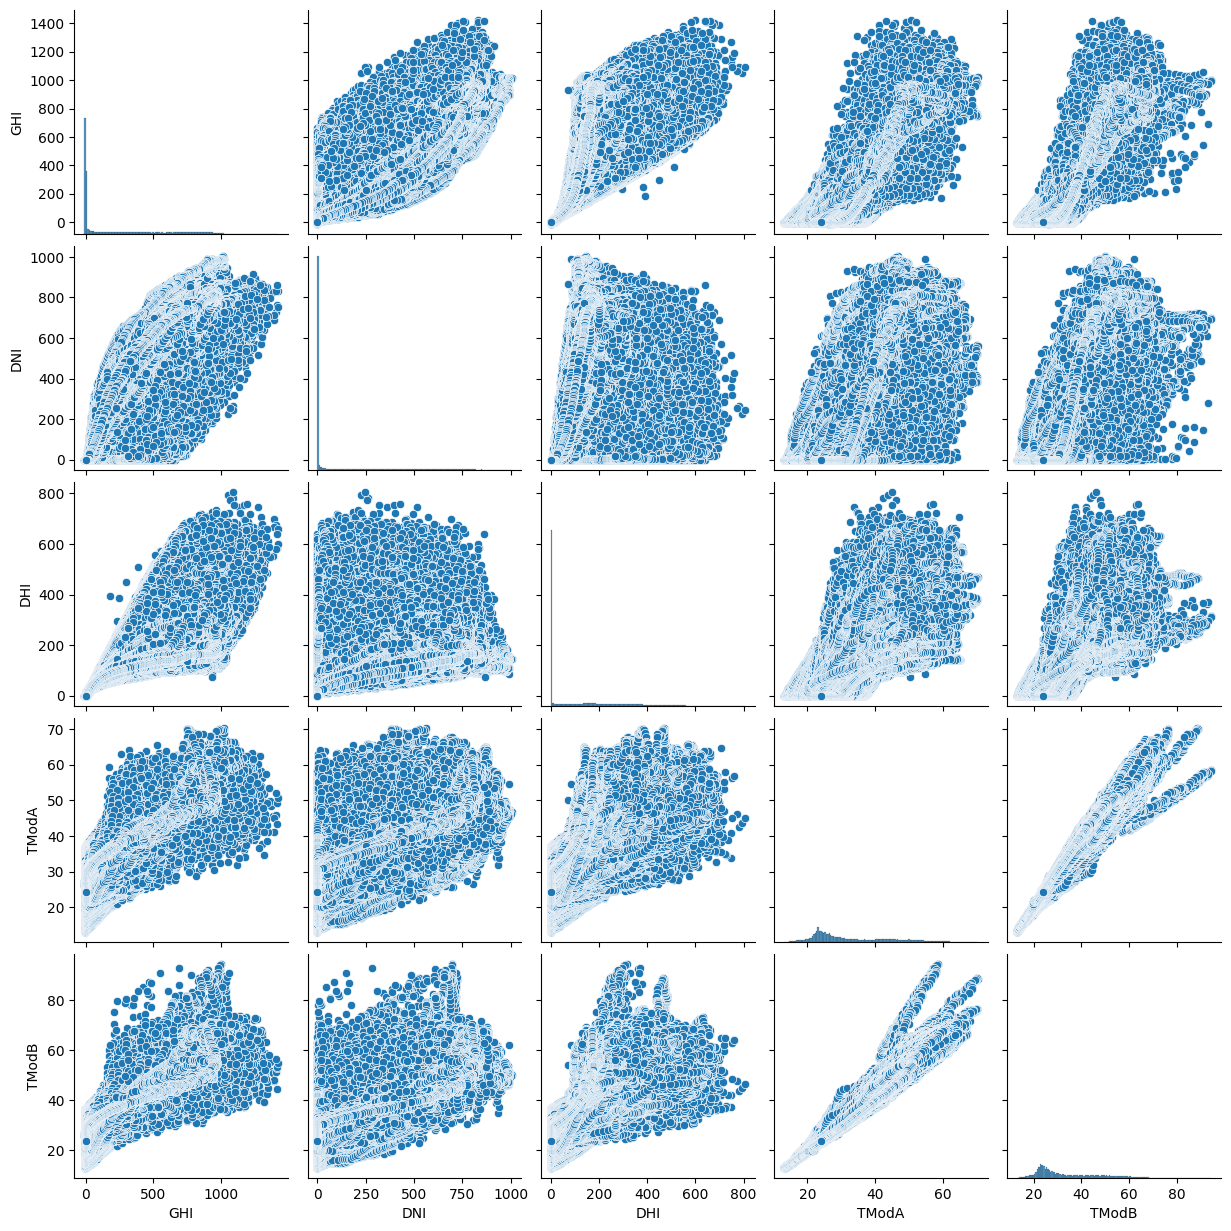

In [6]:
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.show()

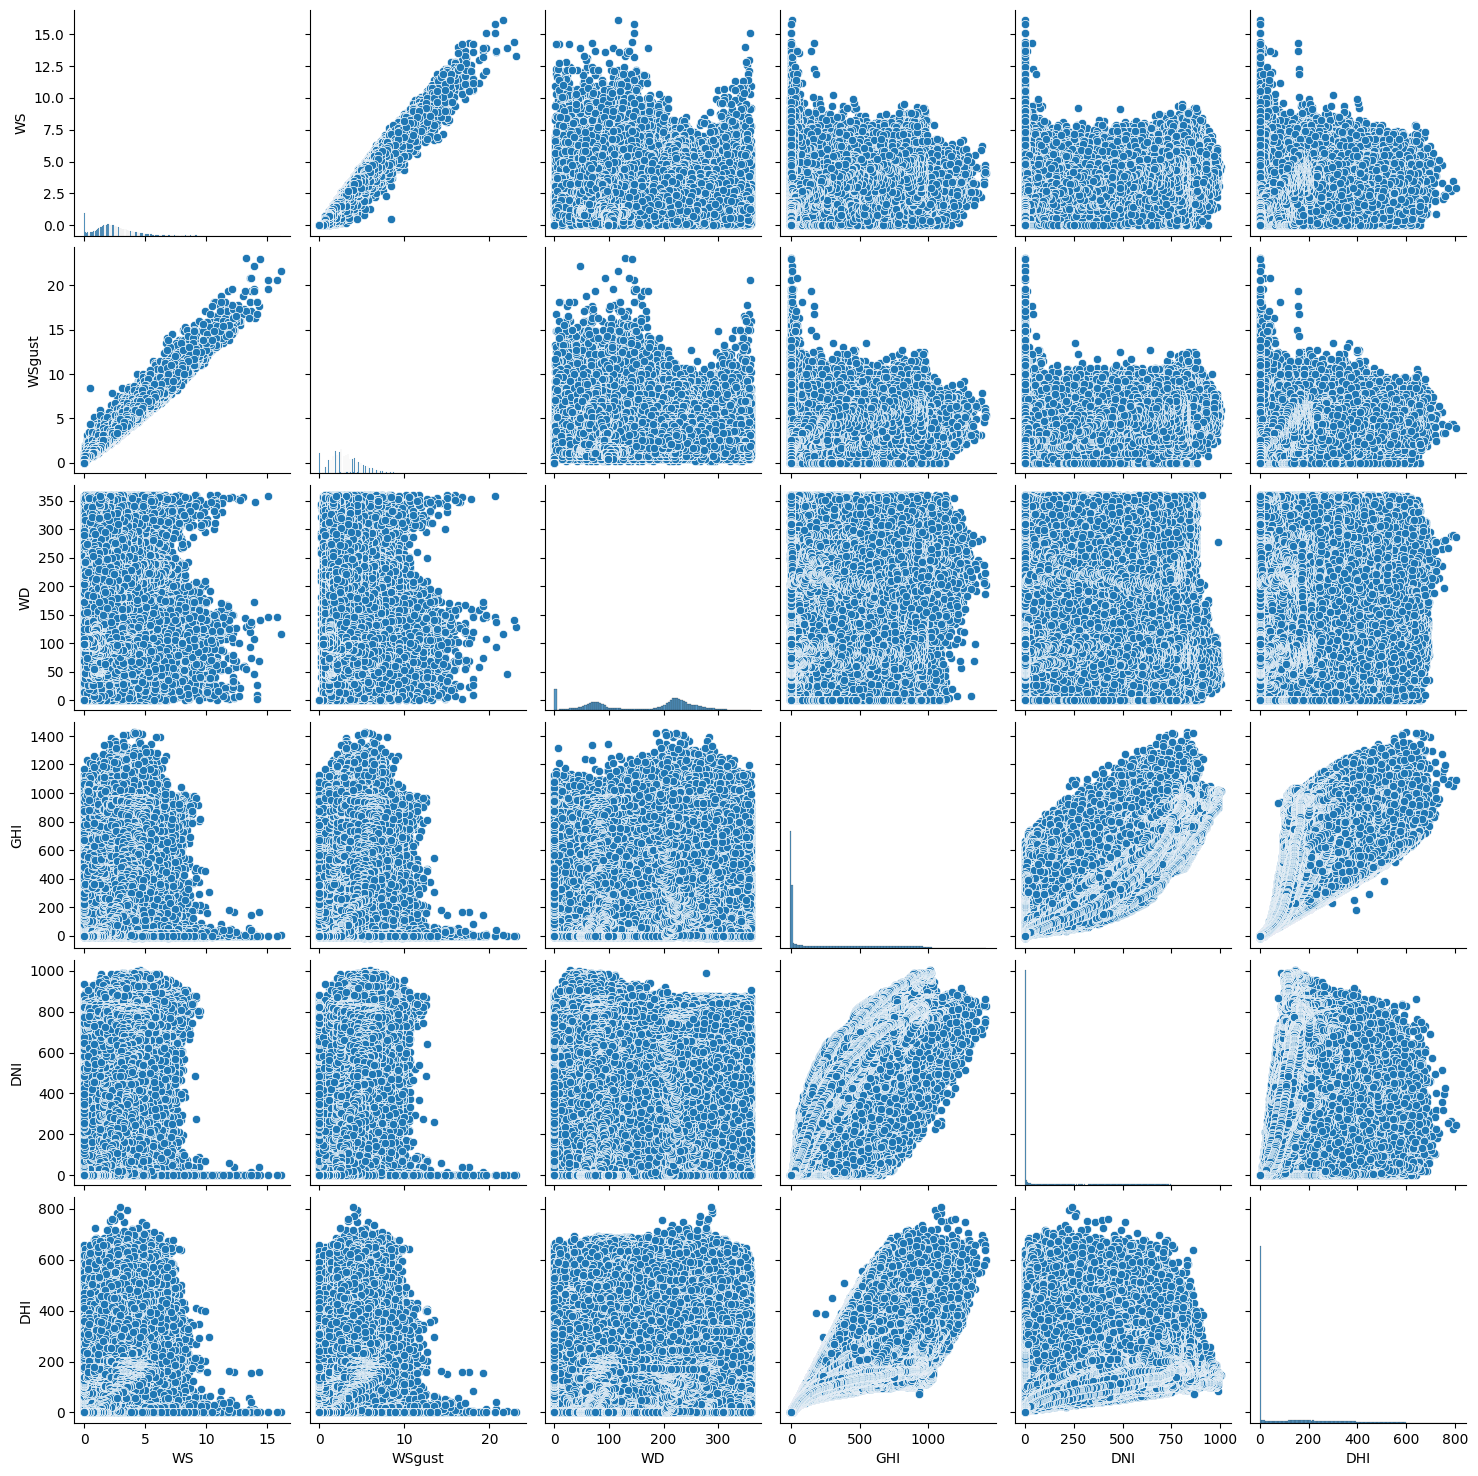

In [7]:
sns.pairplot(df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']])
plt.show()

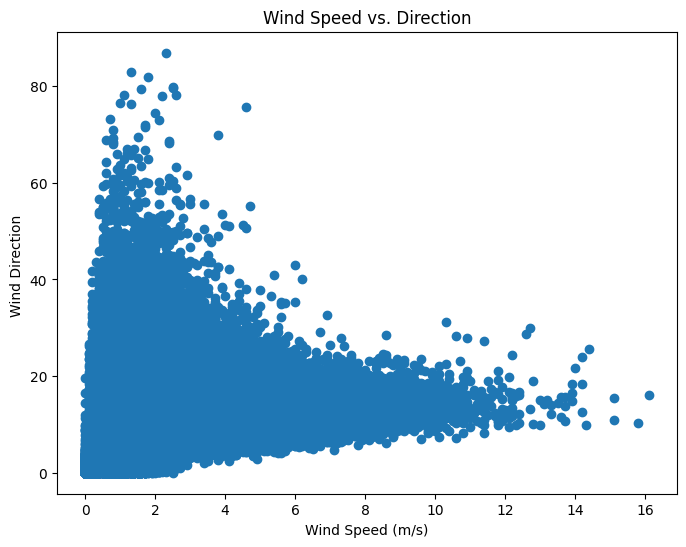

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['WS'], df['WDstdev'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction ')
plt.title('Wind Speed vs. Direction')
plt.show()

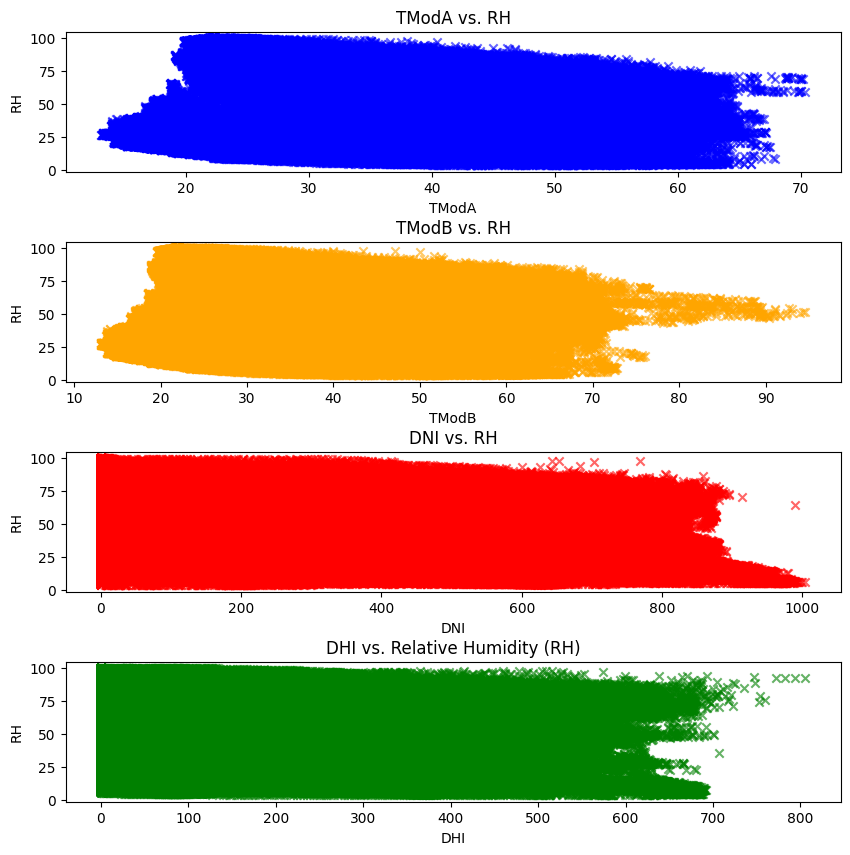

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

axs[0].scatter(df['TModA'], df['RH'], color='blue', marker='x', alpha=0.6)
axs[0].set_title('TModA vs. RH')
axs[0].set_xlabel('TModA')
axs[0].set_ylabel('RH')


axs[1].scatter(df['TModB'], df['RH'], color='orange', marker='x', alpha=0.6)
axs[1].set_title('TModB vs. RH')
axs[1].set_xlabel('TModB')
axs[1].set_ylabel('RH')

axs[2].scatter(df['DNI'], df['RH'], color='red', marker='x', alpha=0.6)
axs[2].set_title('DNI vs. RH')
axs[2].set_xlabel('DNI')
axs[2].set_ylabel('RH')

axs[3].scatter(df['DHI'], df['RH'], color='green', marker='x', alpha=0.6)
axs[3].set_title('DHI vs. Relative Humidity (RH)')
axs[3].set_xlabel('DHI')
axs[3].set_ylabel('RH')
plt.subplots_adjust(hspace=0.5)
plt.show()

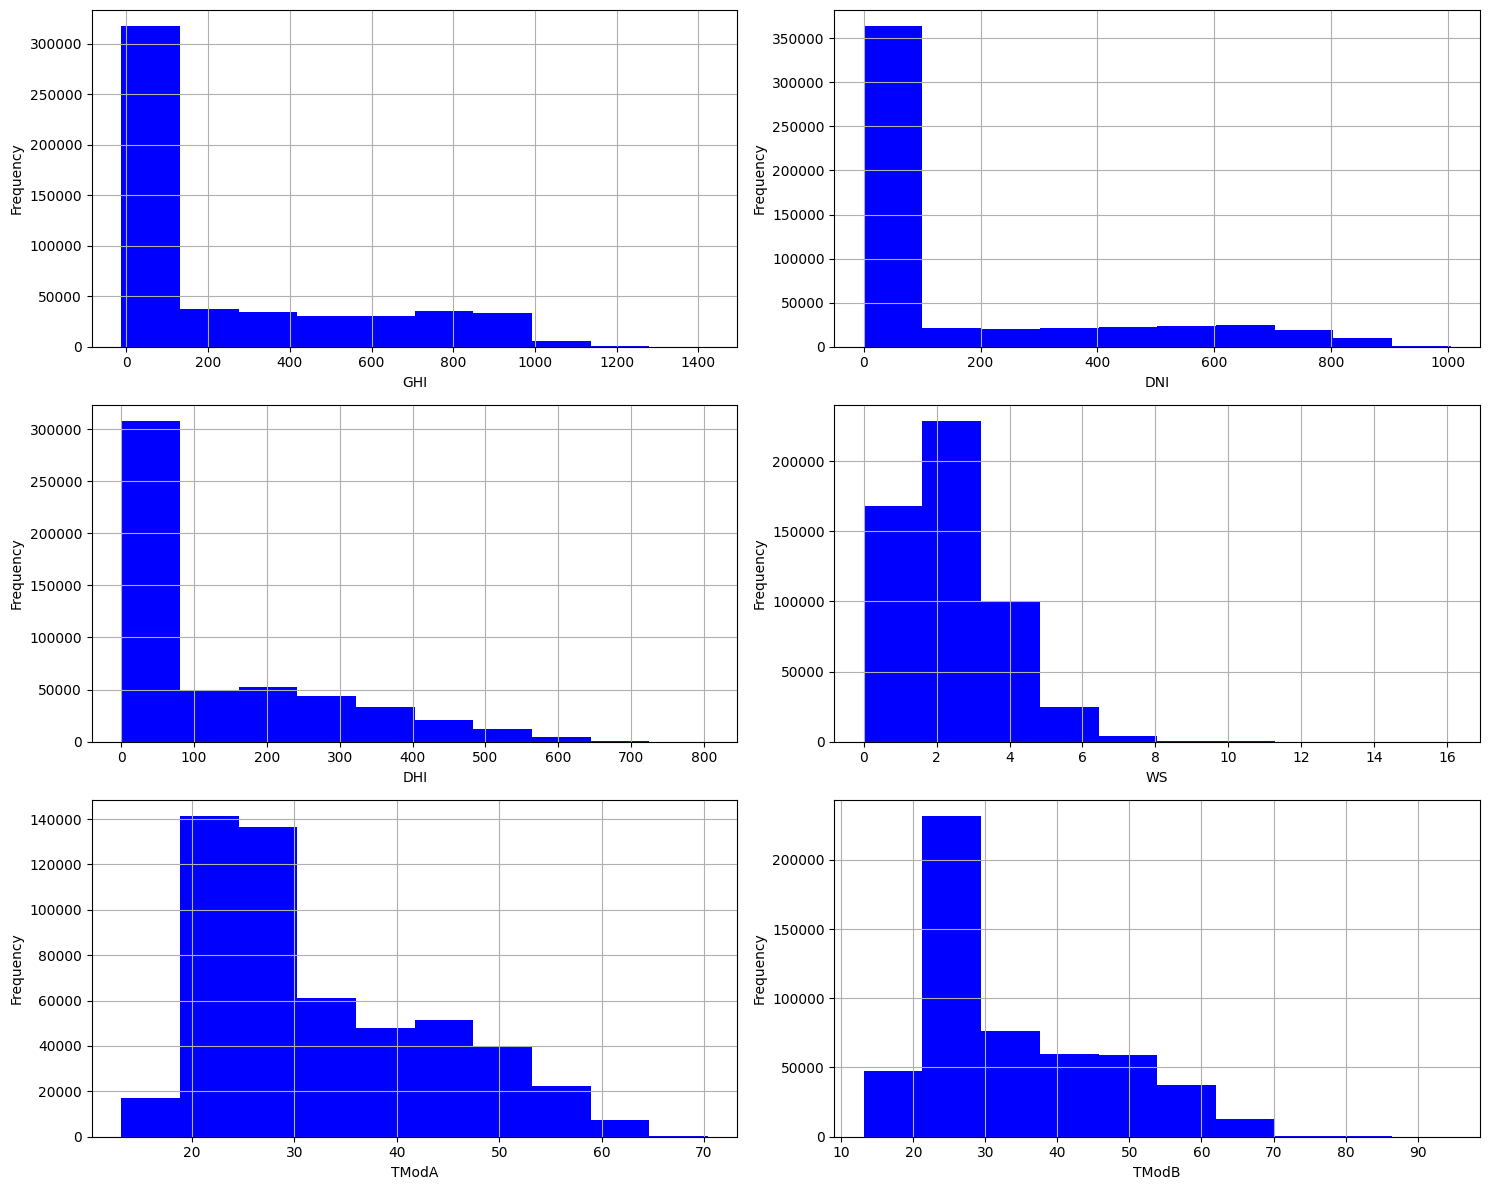

In [10]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']
plt.figure(figsize=(15, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[var], color='blue')

    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid()

plt.tight_layout()
plt.show()

In [11]:
variables = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']
new_df = pd.DataFrame(index=df.index)

for var in variables:
    mean = df[var].mean()
    std = df[var].std()
    new_df[f'Z_{var}'] = (df[var] - mean) / std
    new_df[f'Outlier_{var}'] = np.where(np.abs(new_df[f'Z_{var}']) > 3, True, False)  


result_df = pd.concat([df[variables], new_df], axis=1)


print(result_df[[*variables, *[f'Z_{var}' for var in variables], *[f'Outlier_{var}' for var in variables]]])

                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

                     WSs

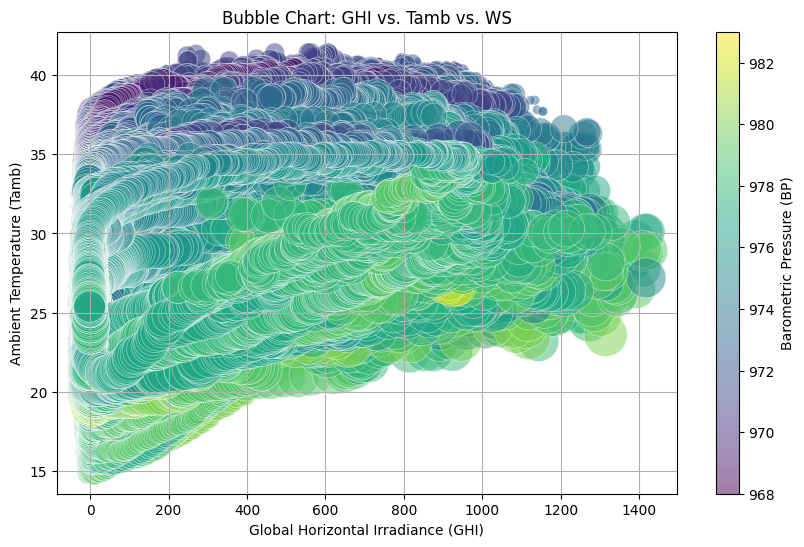

In [12]:
x = df['GHI']  
y = df['Tamb']  
size = df['RH'] * 10  
colors = df['BP']  


plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=size, c=colors, alpha=0.5, cmap='viridis', edgecolors="w", linewidth=0.5)


plt.title('Bubble Chart: GHI vs. Tamb vs. WS')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.colorbar(scatter, label='Barometric Pressure (BP)')
plt.grid()


plt.show()

In [13]:
df= df.drop('Comments', axis=1)
columns_to_replace = ['GHI', 'DNI', 'DHI']

for i in columns_to_replace:
    mean_value = df[i].mean()  
    df[i] = df[i].where(df[i] >= 0, mean_value)
print(df.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Month', 'Hour'],
      dtype='object')
